In [1]:
import torch
import matplotlib.pyplot as plt
from dataload import *
from gan_architecture import *
from utils import get_n_params

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

Loaded image shape in tensor: torch.Size([16, 3, 224, 224])


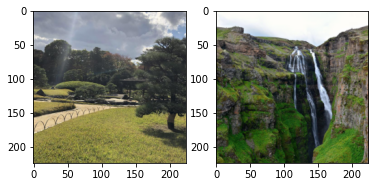

In [2]:
batch_size = 16

train_loader = define_landscapes_loaders(batch_size, batch_size, 
                                        rescale=256,
                                        crop=224,
                                        test_set=False)

z_dim = 1024

# get minibatch
x = next(iter(train_loader))
x_test = next(iter(train_loader))

x = x / 2 + 0.5
x_test = x_test / 2 + 0.5
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [3]:
x.min(), x.max()

(tensor(0.), tensor(1.))

## Test trained model

In [4]:
model = Generator(z_dim).to(device)
#model2 = Discriminator().to(device)
x = torch.randn(batch_size, z_dim)
x = x.to(device)
generated = (model(x))
#model2(generated)

In [5]:
import pandas as pd
fichier = "res-gan-2"


model = Generator(z_dim).to(device)
#model2 = Discriminator().to(device)
model.load_state_dict(torch.load(f"saved_models/{fichier}_generator.sav"))

<All keys matched successfully>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


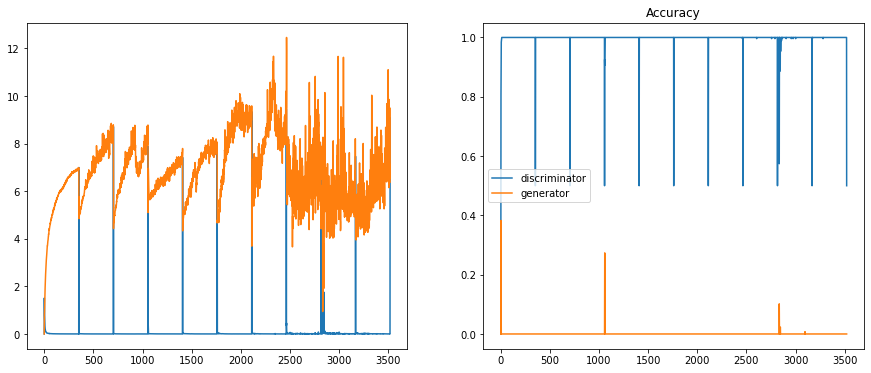

In [6]:
losses = pd.read_csv(f"saved_models/{fichier}_losses.csv")
acc = pd.read_csv(f"saved_models/{fichier}_accs.csv")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.plot(losses.index, losses["discriminator"], label = "discriminator")
ax1.plot(losses.index, losses["generator"], label = "generator")
plt.title("Loss")
plt.legend()
plt.grid()
ax2.plot(acc.index, acc["discriminator"], label = "discriminator")
ax2.plot(acc.index, acc["generator"], label = "generator")
plt.title("Accuracy")
plt.legend()
plt.grid()

Shape : torch.Size([16, 3, 224, 224])


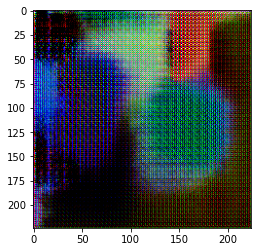

In [22]:
x = torch.randn(batch_size, z_dim)
i = np.random.randint(15)
fig,axes = plt.subplots(1,1)
x = x.to(device)
generated = (((model(x)) - 0.5) * 2)
print(f"Shape : {generated.shape}")
#axes[0].imshow(generated[i].cpu().detach().numpy().transpose((1, 2, 0)))
axes.imshow(generated[i].cpu().detach().numpy().transpose((1, 2, 0)))

In [23]:
generated.min().item(), generated.max().item()

(0.0, 0.9993221759796143)